In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [50]:
df=pd.read_csv("loan_data.csv")

In [51]:
df.head()

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,Male,Yes,4583,128000.0,N
1,Male,Yes,3000,66000.0,Y
2,Male,Yes,2583,120000.0,Y
3,Male,No,6000,141000.0,Y
4,Male,Yes,5417,267000.0,Y


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           577 non-null    object 
 1   Married          577 non-null    object 
 2   ApplicantIncome  577 non-null    int64  
 3   LoanAmount       577 non-null    float64
 4   Loan_Status      577 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 22.7+ KB


In [53]:
df.describe()

,ApplicantIncome,LoanAmount
count,577.000000,577.000000
mean,5297.119584,144968.804159
std,5853.236196,82704.181660
min,150.000000,9000.000000
25%,2889.000000,100000.000000
50%,3800.000000,127000.000000
75%,5746.000000,167000.000000
max,81000.000000,650000.000000


In [54]:
df.shape

(577, 5)

([<matplotlib.patches.Wedge at 0x196518e2310>,
 [Text(-0.6324322795198717, 0.9000163397523954, 'Y'),
  Text(0.6324322795198715, -0.9000163397523955, 'N')],
 [Text(-0.3449630615562936, 0.4909180035013065, '69.5%'),
  Text(0.3449630615562935, -0.49091800350130654, '30.5%')])

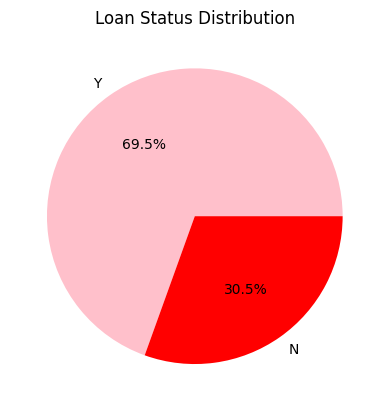

In [55]:
loan_status=df['Loan_Status'].value_counts()
plt.title('Loan Status Distribution')
colors = ['pink', 'red'] 
plt.pie(loan_status.values,labels=loan_status.index,autopct='%1.1f%%',colors=colors)

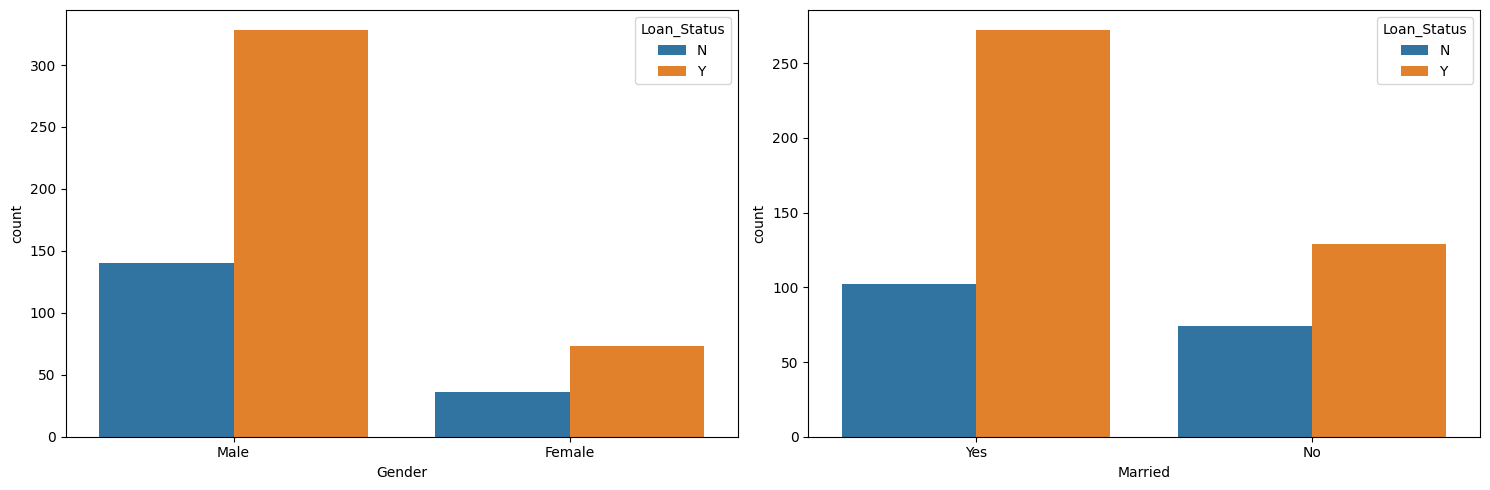

In [56]:
plt.subplots(figsize=(15, 5))

# Iterate over columns
for i, col in enumerate(['Gender', 'Married']):
    ax = plt.subplot(1, 2, i + 1)
    
    # Use 'Loan_Status' instead of 'Loan_status'
    sns.countplot(data=df, x=col, hue='Loan_Status', ax=ax)

    # Explicitly remove overlapping axes
#     ax.remove()

plt.tight_layout()
plt.show()


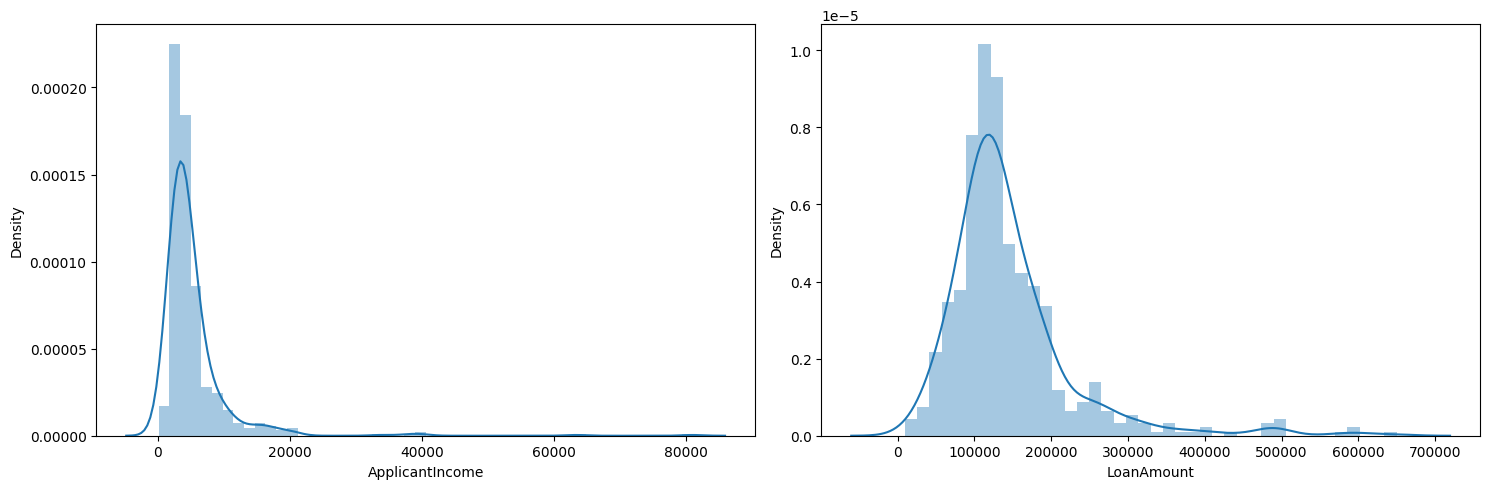

In [57]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sns.distplot(df[col])
plt.tight_layout()
plt.show()

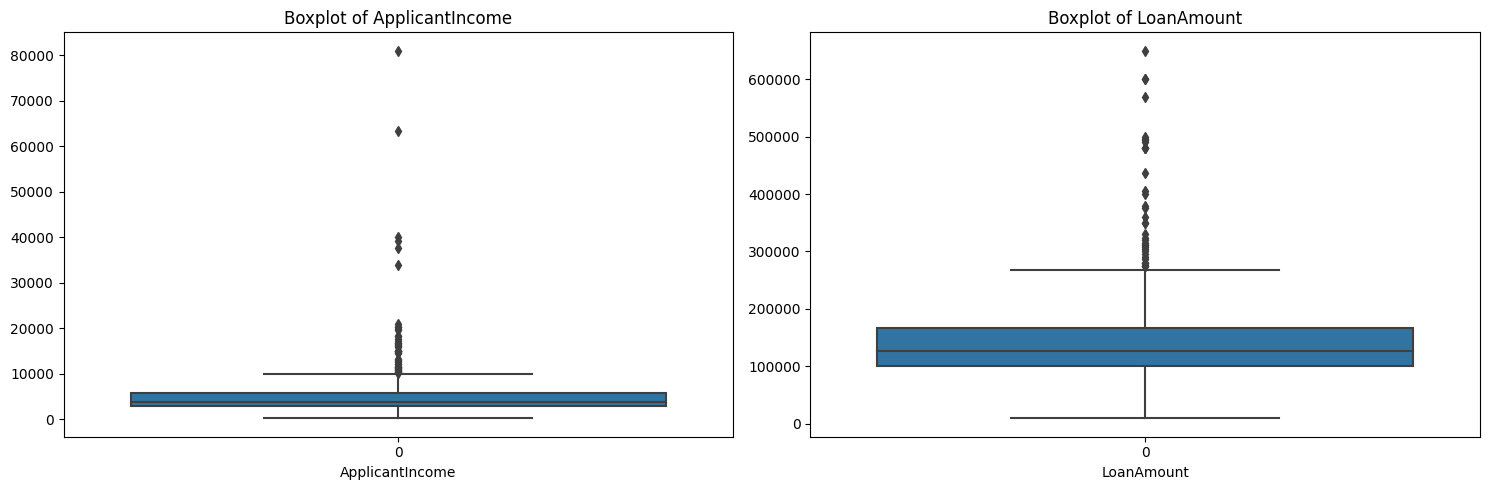

In [58]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col])  #for finding outliers
    plt.xlabel(col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# outliers present

In [59]:
df = df[df['ApplicantIncome'] < 250000]
df = df[df['LoanAmount'] < 400000]


In [79]:
pip install imblearn

   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/235.6 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/235.6 kB ? eta -:--:--
   ------------- ------------------------- 81.9/235.6 kB 762.6 kB/s eta 0:00:01
   ------------------ ------------------- 112.6/235.6 kB 726.2 kB/s eta 0:00:01
   -------------------------- ----------- 163.8/235.6 kB 817.0 kB/s eta 0:00:01
   --------------------------------- ---- 204.8/235.6 kB 827.9 kB/s eta 0:00:01
   -------------------------------------- 235.6/235.6 kB 847.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [80]:
df['LoanAmount'].mean()

135994.67140319716

In [81]:
df.groupby('Gender')['LoanAmount'].mean()

Gender
Female    118822.429907
Male      140024.122807
Name: LoanAmount, dtype: float64

In [82]:
df.groupby(['Married', 'Gender'])['LoanAmount'].mean()

Married  Gender
No       Female    116115.384615
         Male      126852.459016
Yes      Female    126103.448276
         Male      144835.329341
Name: LoanAmount, dtype: float64

# Observation is that married people take more loan than bachelor's 

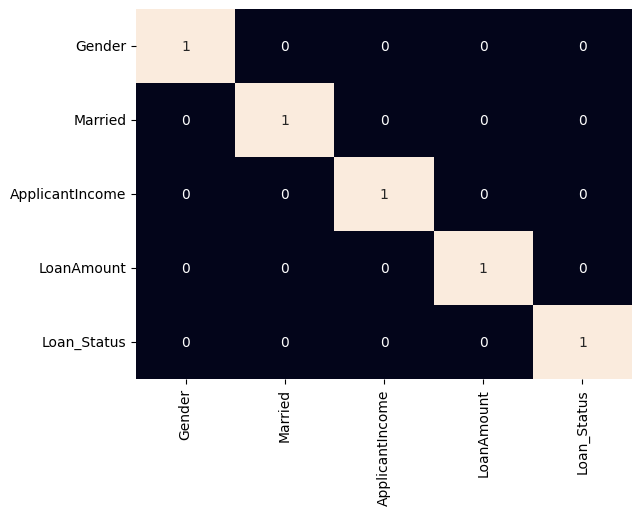

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
# Function to apply label encoding
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
 
    return data
 
# Applying function in whole column
df = encode_labels(df)
 
# Generating Heatmap
sns.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [85]:
features = df.drop('Loan_Status', axis=1)
target = df['Loan_Status'].values
 
X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.2,
                                      random_state=10)
 
# As the data was highly imbalanced we will balance
# it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)
 
X_train.shape, X.shape

((450, 4), (632, 4))

In [86]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [87]:
from sklearn.metrics import roc_auc_score
model = SVC(kernel='rbf')
model.fit(X, Y)
 
print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
print()

Training Accuracy :  0.5933544303797468
Validation Accuracy :  0.5438596491228069



In [88]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
training_roc_auc = roc_auc_score(Y, model.predict(X))
validation_roc_auc = roc_auc_score(Y_val, model.predict(X_val))
print('Training ROC AUC Score:', training_roc_auc)
print('Validation ROC AUC Score:', validation_roc_auc)
print()
cm = confusion_matrix(Y_val, model.predict(X_val))

Training ROC AUC Score: 0.5933544303797468
Validation ROC AUC Score: 0.5438596491228069



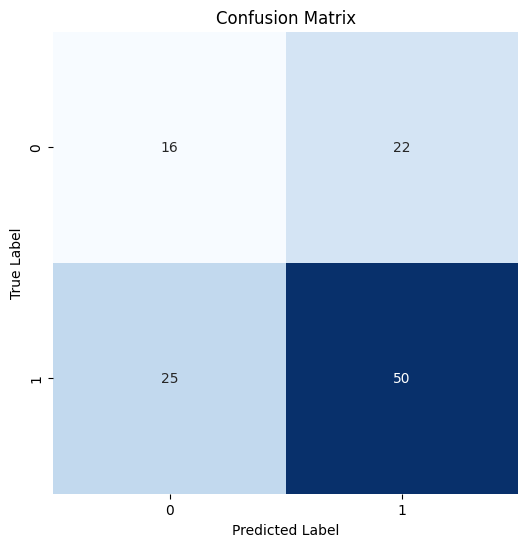

In [90]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [91]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.39      0.42      0.41        38
           1       0.69      0.67      0.68        75

    accuracy                           0.58       113
   macro avg       0.54      0.54      0.54       113
weighted avg       0.59      0.58      0.59       113

